In [1]:
import six

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian_kmers', flotilla_dir=flotilla_dir)
not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

psi = study.splicing.singles.ix[not_outliers]
grouped = psi.groupby(study.sample_id_to_phenotype)
psi_filtered = grouped.apply(lambda x: x.dropna(axis=1, thresh=10))

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-08-09 12:25:10	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian_kmers/datapackage.json
2016-08-09 12:25:10	Parsing datapackage to create a Study object
2016-08-09 12:25:55 	Initializing Study
2016-08-09 12:25:55 	Initializing Predictor configuration manager for Study
2016-08-09 12:25:55	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-08-09 12:25:55	Added ExtraTreesClassifier to default predictors
2016-08-09 12:25:55	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-08-09 12:25:55	Added ExtraTreesRegressor to default predictors
2016-08-09 12:25:55	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-08-09 12:25:55	Added GradientBoostingClassifier to default predictors
2016-08-09 12:25:55	Predictor GradientBoostingRegressor is of type <class '

In [2]:
study.splicing.minimum_samples

10

In [3]:
study.splicing.maybe_renamed_to_feature_id("RPS24")

Index([u'exon:chr10:79796952-79797062:+@exon:chr10:79797723-79797740:+@exon:chr10:79799962-79799983:+',
       u'exon:chr10:79796952-79797062:+@exon:chr10:79797723-79797740:+@exon:chr10:79800373-79800455:+',
       u'exon:chr10:79796952-79797062:+@exon:chr10:79799962-79799983:+@exon:chr10:79800373-79800471:+',
       u'exon:chr10:79797723-79797740:+@exon:chr10:79799962-79799983:+@exon:chr10:79800373-79800428:+',
       u'exon:chr10:79796952-79797062:+@exon:chr10:79797723-79797740:+@exon:chr10:79799962-79799983:+@exon:chr10:79800373-79800471:+'],
      dtype='object')

In [4]:
study.supplemental.modalities_tidy.query('modality == "middle"')['event_id'].values

array([ 'exon:chr10:79796952-79797062:+@exon:chr10:79799962-79799983:+@exon:chr10:79800373-79800471:+'], dtype=object)

In [5]:
folder = 'figures'
!mkdir $folder

figure_folder = '{}/kmer_counting'.format(folder)
! mkdir -p $figure_folder

mkdir: cannot create directory `figures': File exists


## Plot kmer zscore clustering

In [6]:
from anchor import MODALITY_ORDER, MODALITY_TO_COLOR

In [7]:
study.supplemental.kmer_zscores.head()

,upstream200nt_MN_bimodal_placental,downstream200nt_MN_bimodal_placental,upstream200nt_MN_excluded_placental,downstream200nt_MN_excluded_placental,upstream200nt_MN_included_placental,downstream200nt_MN_included_placental,upstream200nt_MN_uncategorized_placental,downstream200nt_MN_uncategorized_placental,upstream200nt_NPC_bimodal_placental,downstream200nt_NPC_bimodal_placental,...,upstream200nt_iPSC_bimodal_placental,downstream200nt_iPSC_bimodal_placental,upstream200nt_iPSC_excluded_placental,downstream200nt_iPSC_excluded_placental,upstream200nt_iPSC_included_placental,downstream200nt_iPSC_included_placental,upstream200nt_iPSC_middle_placental,downstream200nt_iPSC_middle_placental,upstream200nt_iPSC_uncategorized_placental,downstream200nt_iPSC_uncategorized_placental
AAAA,0.113136,0.082748,0.150349,0.082696,-0.088885,-0.060028,0.687319,-0.243258,0.080176,0.075194,...,0.050774,-0.003509,0.133618,0.127251,-0.066793,-0.038270,0.256942,-0.240458,0.230584,0.458103
AAAC,0.109543,0.052302,0.124226,0.095138,-0.079029,-0.050026,-0.251890,-0.092162,0.051833,0.023409,...,0.022376,-0.001678,0.128765,0.131142,-0.050424,-0.037216,-0.239766,-0.238488,0.309504,0.091465
AAAG,0.074881,0.048003,0.167247,0.119318,-0.076365,-0.055243,0.191371,0.063733,0.055469,0.033393,...,0.024470,-0.006113,0.147387,0.134503,-0.057982,-0.036948,0.497336,-0.281911,0.456355,0.236664
AAAT,0.122680,0.064427,0.186898,0.163024,-0.102002,-0.074064,0.280925,-0.206860,0.098596,0.097464,...,0.055123,0.006490,0.168662,0.171894,-0.079575,-0.057500,0.343512,-0.302230,0.309386,0.565609
AACA,0.075162,0.024351,0.106346,0.126378,-0.060991,-0.046313,0.609215,0.035868,0.054138,0.021680,...,0.029712,-0.026021,0.099254,0.150757,-0.046674,-0.031012,-0.258031,-0.241852,0.398441,0.293445


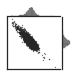

In [8]:
g = sns.jointplot('downstream200nt_iPSC_included_placental', 'downstream200nt_iPSC_excluded_placental', 
                  study.supplemental.kmer_zscores, size=2.5, color='#262626', stat_func=None,
                  joint_kws=dict(alpha=0.5, s=1, rasterized=True))
g.ax_joint.set(xlabel='', xticks=[], ylabel='', yticks=[]);
g.savefig('{}/example_correlation_negative.pdf'.format(figure_folder), dpi=600)

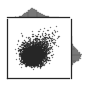

In [9]:
g = sns.jointplot('upstream200nt_iPSC_bimodal_placental', 'upstream200nt_iPSC_excluded_placental', 
                  study.supplemental.kmer_zscores, size=2.5, color='#262626', stat_func=None,
                  joint_kws=dict(alpha=0.5, s=1, rasterized=True))
g.ax_joint.set(xlabel='', xticks=[], ylabel='', yticks=[]);
g.savefig('{}/example_correlation_positive.pdf'.format(figure_folder), dpi=600)

In [10]:
sns.set(style='ticks', context='paper')

In [11]:
study.supplemental.kmer_zscores.min()

upstream200nt_MN_bimodal_placental             -0.052160
downstream200nt_MN_bimodal_placental           -0.062300
upstream200nt_MN_excluded_placental            -0.057601
downstream200nt_MN_excluded_placental          -0.192083
upstream200nt_MN_included_placental            -0.114493
downstream200nt_MN_included_placental          -0.099822
upstream200nt_MN_uncategorized_placental       -0.309408
downstream200nt_MN_uncategorized_placental     -0.537461
upstream200nt_NPC_bimodal_placental            -0.050811
downstream200nt_NPC_bimodal_placental          -0.048784
upstream200nt_NPC_excluded_placental           -0.062764
downstream200nt_NPC_excluded_placental         -0.199416
upstream200nt_NPC_included_placental           -0.107250
downstream200nt_NPC_included_placental         -0.095184
upstream200nt_NPC_uncategorized_placental      -0.354242
downstream200nt_NPC_uncategorized_placental    -0.307731
upstream200nt_iPSC_bimodal_placental           -0.039965
downstream200nt_iPSC_bimodal_pl

In [12]:
cutoff = study.supplemental.kmer_zscores.mean() + 2*study.supplemental.kmer_zscores.std()

zscores_filtered = study.supplemental.kmer_zscores[study.supplemental.kmer_zscores > cutoff].dropna(how='all')
six.print_(zscores_filtered.shape)
zscores_filtered

(2179, 26)


,upstream200nt_MN_bimodal_placental,downstream200nt_MN_bimodal_placental,upstream200nt_MN_excluded_placental,downstream200nt_MN_excluded_placental,upstream200nt_MN_included_placental,downstream200nt_MN_included_placental,upstream200nt_MN_uncategorized_placental,downstream200nt_MN_uncategorized_placental,upstream200nt_NPC_bimodal_placental,downstream200nt_NPC_bimodal_placental,...,upstream200nt_iPSC_bimodal_placental,downstream200nt_iPSC_bimodal_placental,upstream200nt_iPSC_excluded_placental,downstream200nt_iPSC_excluded_placental,upstream200nt_iPSC_included_placental,downstream200nt_iPSC_included_placental,upstream200nt_iPSC_middle_placental,downstream200nt_iPSC_middle_placental,upstream200nt_iPSC_uncategorized_placental,downstream200nt_iPSC_uncategorized_placental
AAAA,0.113136,0.082748,0.150349,NaN,NaN,NaN,NaN,NaN,0.080176,0.075194,...,0.050774,NaN,0.133618,0.127251,NaN,NaN,NaN,NaN,NaN,0.458103
AAAC,0.109543,NaN,0.124226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.128765,0.131142,NaN,NaN,NaN,NaN,NaN,NaN
AAAG,NaN,NaN,0.167247,0.119318,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.147387,0.134503,NaN,NaN,NaN,NaN,NaN,NaN
AAAT,0.122680,0.064427,0.186898,0.163024,NaN,NaN,NaN,NaN,0.098596,0.097464,...,0.055123,NaN,0.168662,0.171894,NaN,NaN,NaN,NaN,NaN,0.565609
AACA,NaN,NaN,NaN,0.126378,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.150757,NaN,NaN,NaN,NaN,NaN,NaN
AACC,NaN,0.069334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACT,0.122980,NaN,NaN,0.144544,NaN,NaN,NaN,NaN,0.072700,0.052168,...,NaN,NaN,0.142018,0.129487,NaN,NaN,NaN,NaN,NaN,NaN
AAGA,NaN,NaN,0.148118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.149512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAGC,NaN,NaN,0.193461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.143242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAGG,NaN,NaN,0.123529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
uncategorized_middle_cols = [x for x in study.supplemental.kmer_zscores.columns if 'middle' in x or 'uncategorized' in x]

In [14]:
uncategorized_middle_zscores = zscores_filtered[uncategorized_middle_cols].dropna(how='all')
uncategorized_middle_zscores

,upstream200nt_MN_uncategorized_placental,downstream200nt_MN_uncategorized_placental,upstream200nt_NPC_uncategorized_placental,downstream200nt_NPC_uncategorized_placental,upstream200nt_iPSC_middle_placental,downstream200nt_iPSC_middle_placental,upstream200nt_iPSC_uncategorized_placental,downstream200nt_iPSC_uncategorized_placental
AAAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.458103
AAAG,NaN,NaN,NaN,1.558418,NaN,NaN,NaN,NaN
AAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.565609
AACT,NaN,NaN,0.882991,NaN,NaN,NaN,NaN,NaN
AAGC,NaN,NaN,NaN,1.390905,NaN,NaN,NaN,NaN
AATC,NaN,NaN,NaN,NaN,0.978741,NaN,NaN,NaN
AATG,0.953488,NaN,NaN,1.106165,NaN,NaN,NaN,NaN
ACAT,NaN,0.589560,NaN,NaN,NaN,NaN,NaN,NaN
ACCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.397813
ACTA,NaN,NaN,NaN,NaN,1.127581,1.451867,NaN,NaN


In [15]:
sns.set(context='paper', style='ticks')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


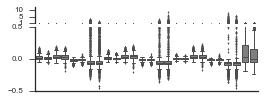

In [16]:
fig, axes = plt.subplots(nrows=2, figsize=(4, 1.5), gridspec_kw=dict(height_ratios=(0.2, 0.8), hspace=0.1))

kwargs = dict(linewidth=1, fliersize=2, color='grey')

ax = axes[0]
sns.boxplot(study.supplemental.kmer_zscores, ax=ax, **kwargs)
# ax.locator_params(nbins=4, axis='y')
ax.set(xlabel='', xticks=[], ylabel='', ylim=(1, 12), yticks=[1, 5, 10])
sns.despine(ax=ax, bottom=True)

ax=axes[1]
sns.boxplot(study.supplemental.kmer_zscores, ax=ax, **kwargs)
ax.set(xlabel='', xticks=[], ylabel='', ylim=(-0.5, .5))

# plt.setp(ax.get_xticklabels(), rotation=90);
sns.despine(ax=ax)
ax.locator_params(nbins=3, axis='y')
# fig.tight_layout()
fig.savefig('{}/kmer_zscores_boxplot.pdf'.format(figure_folder))

In [17]:
sns.set(context='paper', style='whitegrid')
columns = study.supplemental.kmer_zscores.columns

direction_to_color = {'upstream': '#F2F2F2', # 95% white out of black
                      'downstream': '#262626' # 15% white out of black
                     }

phenotype_colors = columns.map(lambda x: study.phenotype_to_color[x.split('_')[1]])
modality_colors = columns.map(lambda x: MODALITY_TO_COLOR[x.split('_')[2]])
direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')])
intron_colors = pd.DataFrame([modality_colors, direction_colors, phenotype_colors], columns=columns)
intron_colors

,upstream200nt_MN_bimodal_placental,downstream200nt_MN_bimodal_placental,upstream200nt_MN_excluded_placental,downstream200nt_MN_excluded_placental,upstream200nt_MN_included_placental,downstream200nt_MN_included_placental,upstream200nt_MN_uncategorized_placental,downstream200nt_MN_uncategorized_placental,upstream200nt_NPC_bimodal_placental,downstream200nt_NPC_bimodal_placental,...,upstream200nt_iPSC_bimodal_placental,downstream200nt_iPSC_bimodal_placental,upstream200nt_iPSC_excluded_placental,downstream200nt_iPSC_excluded_placental,upstream200nt_iPSC_included_placental,downstream200nt_iPSC_included_placental,upstream200nt_iPSC_middle_placental,downstream200nt_iPSC_middle_placental,upstream200nt_iPSC_uncategorized_placental,downstream200nt_iPSC_uncategorized_placental
0,"(0.505882352941, 0.447058823529, 0.698039215686)","(0.505882352941, 0.447058823529, 0.698039215686)","(0.392156862745, 0.709803921569, 0.803921568627)","(0.392156862745, 0.709803921569, 0.803921568627)","(0.76862745098, 0.305882352941, 0.321568627451)","(0.76862745098, 0.305882352941, 0.321568627451)",lightgrey,lightgrey,"(0.505882352941, 0.447058823529, 0.698039215686)","(0.505882352941, 0.447058823529, 0.698039215686)",...,"(0.505882352941, 0.447058823529, 0.698039215686)","(0.505882352941, 0.447058823529, 0.698039215686)","(0.392156862745, 0.709803921569, 0.803921568627)","(0.392156862745, 0.709803921569, 0.803921568627)","(0.76862745098, 0.305882352941, 0.321568627451)","(0.76862745098, 0.305882352941, 0.321568627451)","(0.8, 0.725490196078, 0.454901960784)","(0.8, 0.725490196078, 0.454901960784)",lightgrey,lightgrey
1,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626,...,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626
2,#228a44,#228a44,#228a44,#228a44,#228a44,#228a44,#228a44,#228a44,#73c476,#73c476,...,#c7e9c0,#c7e9c0,#c7e9c0,#c7e9c0,#c7e9c0,#c7e9c0,#c7e9c0,#c7e9c0,#c7e9c0,#c7e9c0


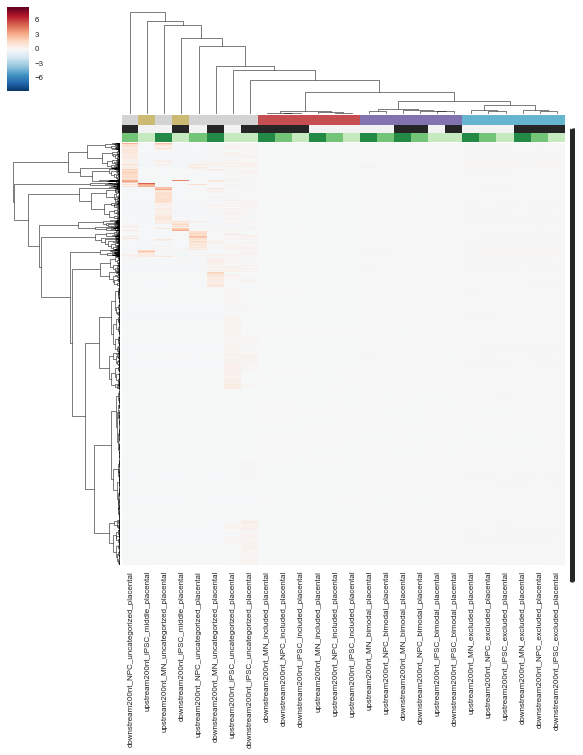

In [19]:
sns.clustermap(study.supplemental.kmer_zscores, method='ward', col_colors=intron_colors.values)

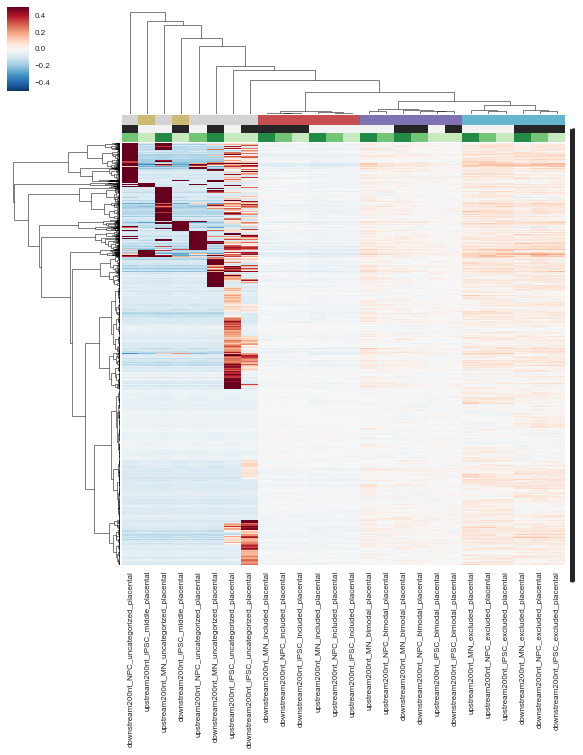

In [21]:
sns.clustermap(study.supplemental.kmer_zscores, method='ward', col_colors=intron_colors.values, vmin=-.5, vmax=.5)

In [22]:
excluded_bimodal_included_cols = [x for x in study.supplemental.kmer_zscores.columns if 'bimodal' in x or 'included' in x or 'excluded' in x]
excluded_bimodal_included_cols

['upstream200nt_MN_bimodal_placental',
 'downstream200nt_MN_bimodal_placental',
 'upstream200nt_MN_excluded_placental',
 'downstream200nt_MN_excluded_placental',
 'upstream200nt_MN_included_placental',
 'downstream200nt_MN_included_placental',
 'upstream200nt_NPC_bimodal_placental',
 'downstream200nt_NPC_bimodal_placental',
 'upstream200nt_NPC_excluded_placental',
 'downstream200nt_NPC_excluded_placental',
 'upstream200nt_NPC_included_placental',
 'downstream200nt_NPC_included_placental',
 'upstream200nt_iPSC_bimodal_placental',
 'downstream200nt_iPSC_bimodal_placental',
 'upstream200nt_iPSC_excluded_placental',
 'downstream200nt_iPSC_excluded_placental',
 'upstream200nt_iPSC_included_placental',
 'downstream200nt_iPSC_included_placental']

In [25]:
excluded_bimodal_included_phenotype_colors = [study.phenotype_to_color[x.split('_')[1]] for x in excluded_bimodal_included_cols]
excluded_bimodal_included_modality_colors = [MODALITY_TO_COLOR[x.split('_')[2]] for x in excluded_bimodal_included_cols]
excluded_bimodal_included_direction_colors = [direction_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')] for x in 
                                              excluded_bimodal_included_cols]
excluded_bimodal_included_intron_colors = [excluded_bimodal_included_modality_colors, 
                                           excluded_bimodal_included_direction_colors, 
                                           excluded_bimodal_included_phenotype_colors]

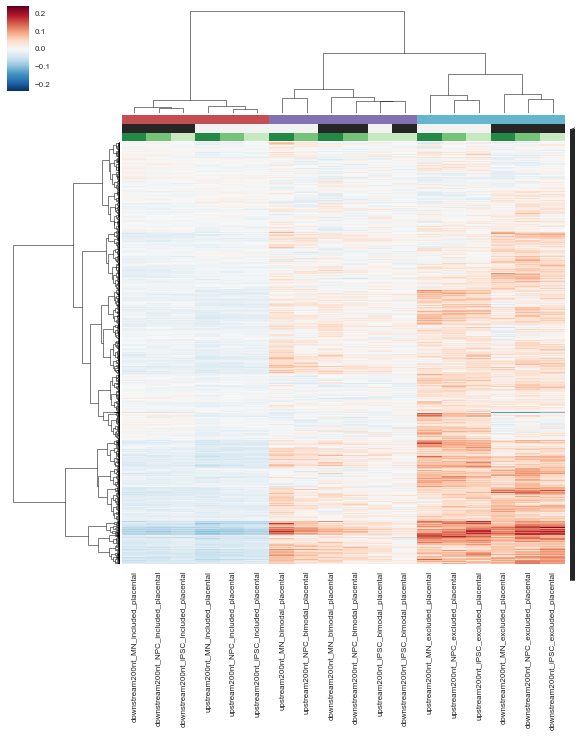

In [26]:
sns.clustermap(study.supplemental.kmer_zscores[excluded_bimodal_included_cols], 
               method='ward', col_colors=excluded_bimodal_included_intron_colors)

In [27]:
kmer_corr = study.supplemental.kmer_zscores.corr()

In [28]:
cmap = 'RdBu_r' #sns.diverging_palette(220, 0, as_cmap=True)

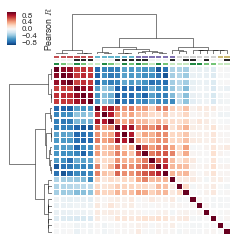

In [30]:
g = sns.clustermap(kmer_corr, col_colors=intron_colors.values, method='ward', 
                   cbar_kws=dict(label='Pearson $R$'), vmin=-1, vmax=1,
                   linewidth=0.5, figsize=(4, 4), cmap=cmap)
g.ax_heatmap.set(xticks=[], yticks=[])
g.savefig('{}/kmer_zscore_pearson_correlation_clustermap.pdf'.format(figure_folder))

In [31]:
figure_folder

'figures/kmer_counting'

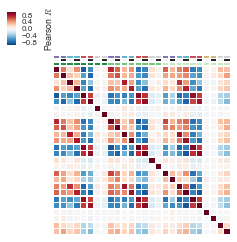

In [33]:
g = sns.clustermap(kmer_corr, col_colors=intron_colors.values, method='ward', 
                   cbar_kws=dict(label='Pearson $R$'), vmin=-1, vmax=1,
                   linewidth=0.5, figsize=(4, 4), cmap=cmap, col_cluster=False, row_cluster=False)
g.ax_heatmap.set(xticks=[], yticks=[])
g.savefig('{}/kmer_zscore_pearson_correlation_clustermap_no_clustering.pdf'.format(figure_folder))

## Match known motifs to kmers

In [34]:
import kvector

cisbp_folder = '/projects/ps-yeolab/obotvinnik/cisbp_v2'

# cisbp_motifs = kvector.read_motifs('{}/pwms_homer/all_rbps.motif'.format(cisbp_folder), 'ACGT')

In [35]:
ls $cisbp_folder/*csv

/projects/ps-yeolab/obotvinnik/cisbp_v2/cisbp_kvector_456.csv
/projects/ps-yeolab/obotvinnik/cisbp_v2/cisbp_motif_metadata.csv
/projects/ps-yeolab/obotvinnik/cisbp_v2/kmers_in_cisbp_motifs_thresh05.csv


In [36]:
cisbp_kmers = pd.read_csv('{}/kmers_in_cisbp_motifs_thresh05.csv'.format(cisbp_folder), index_col=0)
cisbp_kmers.head()

,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS,M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster,M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes,M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster,M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster,...,M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens,M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens,M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens,M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens,M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens,M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens
AAAA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
AAAC,False,False,False,False,False,False,True,True,False,False,...,True,False,False,False,True,False,True,False,False,False
AAAG,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,True,False
AAAT,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,True,True,False,False,False,False
AACA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,True,False,False


In [37]:
cisbp_metadata = pd.DataFrame.from_records(list(cisbp_kmers.columns.map(lambda x: x.split()[0].split('_'))))
# cisbp_metadata = cisbp_metadata.replace(None, np.nan)
cisbp_metadata.index = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_metadata = cisbp_metadata.rename(columns={0:'Motif ID', 1: "Version", 2: "RBP Name", 3: "RBP ID", 4: "Genus", 5: "Species"})
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,10,11,12,13,14,15,16,17,18,19
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,None,None,None,None,None,None,None,None,None,None


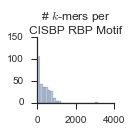

In [38]:
sns.set(style='ticks')    
fig, ax = plt.subplots(figsize=(2, 2))
sns.distplot(cisbp_kmers.sum(), kde=False)
ax.locator_params(nbins=3)
xmin, xmax = ax.get_xlim()
ax.set(xlim=(0, xmax), title='# $k$-mers per\nCISBP RBP Motif')
sns.despine()
fig.tight_layout()
fig.savefig('{}/cisbp_kmer_distribution.pdf'.format(figure_folder))

In [39]:
kmer_sum = cisbp_kmers.sum()
kmer_sum[kmer_sum > 2000]

M255_0.6_PUM1_ENSG00000134644_Homo_sapiens    3153
dtype: int64

In [40]:
from scipy.stats import ttest_1samp
kmer_means = study.supplemental.kmer_zscores.mean()

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for intron_name, intron_col in study.supplemental.kmer_zscores.iteritems():
    for cisbp_name, cisbp_kmer in cisbp_kmers.iteritems():
        x = intron_col[cisbp_kmer]
        y = intron_col
#         sign = np.sign(x.median() - y.median())
#         statistic, p_value = mannwhitneyu(x, y)
#         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_utest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif long', 'T-Statistic', '$p$-value',])
print kmer_cisbp_utest_tidy.shape
kmer_cisbp_utest_tidy.head()

(7722, 4)


,Intron,RBP Motif long,T-Statistic,$p$-value
0,upstream200nt_MN_bimodal_placental,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,9.773922,3.405719e-10
1,upstream200nt_MN_bimodal_placental,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-8.180691,2.151080e-11
2,upstream200nt_MN_bimodal_placental,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...,7.419889,9.559275e-12
3,upstream200nt_MN_bimodal_placental,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,11.299489,1.449073e-26
4,upstream200nt_MN_bimodal_placental,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,17.602577,4.493884e-23


In [41]:
sns.set(style='ticks', context='talk')

In [42]:
cisbp_metadata.loc[cisbp_metadata['RBP Name'] == 'MBNL3']

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,10,11,12,13,14,15,16,17,18,19
M037_0.6_MBNL3_ENSG00000076770_Homo_sapiens,M037,0.6,MBNL3,ENSG00000076770,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M320_0.6_MBNL3_ENSG00000076770_Homo_sapiens,M320,0.6,MBNL3,ENSG00000076770,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None


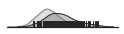

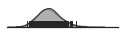

In [43]:
rbp_name = 'MBNL3'

cisbp_ids = cisbp_metadata.loc[cisbp_metadata['RBP Name'] == rbp_name].index
for cisbp_id in cisbp_ids:
    x = study.supplemental.kmer_zscores['upstream200nt_iPSC_bimodal_placental']
    y = x[cisbp_kmers[cisbp_id]]

    fig, ax = plt.subplots(figsize=(2, .75))

    bins = np.linspace(x.min(), x.max(), 50)
    sns.distplot(x, kde=True, hist=False, label='iPSC bimodal upstream', bins=bins, 
                 color='grey', kde_kws=dict(shade=True, linewidth=1))
    sns.distplot(y, kde=True, hist=False, label=rbp_name, bins=bins, rug=True, rug_kws=dict(height=0.3),
                 kde_kws=dict(shade=True, linewidth=1), color='#262626')
    ax.locator_params(nbins=4)
    ax.legend(loc='best', fontsize=10)
    sns.despine(left=True)
    ax.legend_.set_visible(False)
    ax.set(xlabel='', xticks=[], yticks=[])
    fig.tight_layout()
    fig.savefig('{}/distplot_{}_vs_ipsc_bimodal_upstream.pdf'.format(figure_folder, cisbp_id))
# ymin, ymax = ax.get_ylim()
# ax.vlines(y, 0, ymax*.1, alpha=0.5)

In [44]:
kmer_cisbp_utest_tidy['RBP Motif'] = kmer_cisbp_utest_tidy['RBP Motif long'].str.split().str.get(0)
kmer_cisbp_utest_tidy.head()

,Intron,RBP Motif long,T-Statistic,$p$-value,RBP Motif
0,upstream200nt_MN_bimodal_placental,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,9.773922,3.405719e-10,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens
1,upstream200nt_MN_bimodal_placental,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-8.180691,2.151080e-11,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens
2,upstream200nt_MN_bimodal_placental,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...,7.419889,9.559275e-12,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...
3,upstream200nt_MN_bimodal_placental,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,11.299489,1.449073e-26,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens
4,upstream200nt_MN_bimodal_placental,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,17.602577,4.493884e-23,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans


In [45]:
study.gene_ontology.data.head()

,Ensembl Gene ID,Associated Gene Name,GOSlim GOA Accession(s),GO Term Accession,GO Term Name,GO domain
0,ENSG00000177275,OR2AJ1,GO:0008150,GO:0007186,G-protein coupled receptor signaling pathway,biological_process
1,ENSG00000177275,OR2AJ1,GO:0003674,GO:0007186,G-protein coupled receptor signaling pathway,biological_process
2,ENSG00000177275,OR2AJ1,GO:0005575,GO:0007186,G-protein coupled receptor signaling pathway,biological_process
3,ENSG00000177275,OR2AJ1,GO:0005623,GO:0007186,G-protein coupled receptor signaling pathway,biological_process
4,ENSG00000177275,OR2AJ1,GO:0005886,GO:0007186,G-protein coupled receptor signaling pathway,biological_process


In [46]:
cisbp_metadata['Full Species'] = cisbp_metadata['Genus'] + ' ' + cisbp_metadata['Species']
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Full Species
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Drosophila melanogaster
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Caenorhabditis elegans


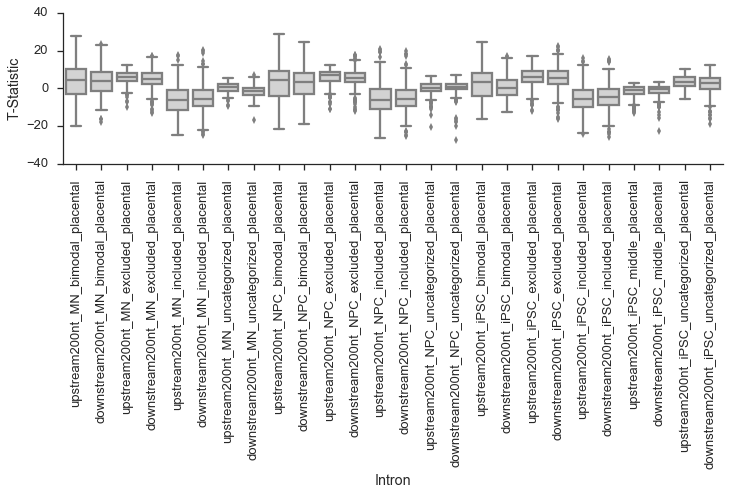

In [47]:
fig, ax = plt.subplots()
sns.boxplot(x='Intron', y='T-Statistic', data=kmer_cisbp_utest_tidy, color='lightgrey')
plt.setp(ax.get_xticklabels(), rotation=90);
sns.despine()
ax.locator_params(nbins=4, axis='y')
fig.tight_layout()
fig.savefig('{}/t_statistic_boxplots.pdf'.format(figure_folder))

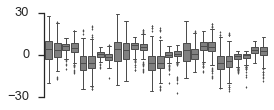

In [48]:
fig, ax = plt.subplots(figsize=(4, 1.5))

kwargs = dict(linewidth=1, fliersize=2, color='grey')

sns.boxplot(x='Intron', y='T-Statistic', data=kmer_cisbp_utest_tidy, ax=ax, **kwargs)
# ax.locator_params(nbins=4, axis='y')
ax.set(xlabel='', xticks=[], ylabel='', ylim=(-30, 30), yticks=(-30, 0, 30))
sns.despine(ax=ax, bottom=True)
fig.savefig('{}/t_statistic_boxplots.pdf'.format(figure_folder))

In [49]:
t_statistic = kmer_cisbp_utest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
print t_statistic.shape
t_statistic.head()

(297, 26)


Intron,downstream200nt_MN_bimodal_placental,downstream200nt_MN_excluded_placental,downstream200nt_MN_included_placental,downstream200nt_MN_uncategorized_placental,downstream200nt_NPC_bimodal_placental,downstream200nt_NPC_excluded_placental,downstream200nt_NPC_included_placental,downstream200nt_NPC_uncategorized_placental,downstream200nt_iPSC_bimodal_placental,downstream200nt_iPSC_excluded_placental,...,upstream200nt_MN_uncategorized_placental,upstream200nt_NPC_bimodal_placental,upstream200nt_NPC_excluded_placental,upstream200nt_NPC_included_placental,upstream200nt_NPC_uncategorized_placental,upstream200nt_iPSC_bimodal_placental,upstream200nt_iPSC_excluded_placental,upstream200nt_iPSC_included_placental,upstream200nt_iPSC_middle_placental,upstream200nt_iPSC_uncategorized_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,8.763746,3.865158,-6.125987,-4.469174,7.858505,3.220750,-5.864762,2.026635,5.171420,5.222785,...,-0.735882,9.318185,7.889945,-10.126034,0.919297,7.974251,7.428721,-8.556934,0.203737,1.754803
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-10.528870,-3.050041,8.923962,-7.885387,-13.803576,-2.588470,10.714132,-0.450665,-6.865831,-4.452394,...,-0.918928,-9.858018,-2.120351,9.979987,-9.708751,-4.303502,-4.668265,7.931694,-0.265219,-1.123094
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,8.261676,8.336832,-9.651403,-4.751974,7.914568,8.714022,-9.616511,-1.586079,4.279971,9.410037,...,-2.290080,8.671721,5.680334,-9.033874,4.294367,7.181337,7.759442,-8.978669,-11.839715,4.578844
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,9.324577,8.590319,-10.461790,-4.393504,9.016198,8.443369,-10.047913,-2.878129,8.265806,8.709587,...,1.083059,10.518245,7.331684,-10.969595,3.423258,8.598927,9.252545,-10.638675,-10.536098,5.943301
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,14.121159,14.561058,-15.822844,0.393266,18.187238,13.109685,-17.058516,0.331271,12.871863,14.534430,...,1.645600,19.606673,8.668747,-16.896259,2.573978,17.160380,11.374127,-15.132981,-1.471589,7.961376


In [50]:
t_statistic = t_statistic[study.supplemental.kmer_zscores.columns]

In [51]:
t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape
t_statistic_homo_sapiens.head()

(172, 26)


Intron,upstream200nt_MN_bimodal_placental,downstream200nt_MN_bimodal_placental,upstream200nt_MN_excluded_placental,downstream200nt_MN_excluded_placental,upstream200nt_MN_included_placental,downstream200nt_MN_included_placental,upstream200nt_MN_uncategorized_placental,downstream200nt_MN_uncategorized_placental,upstream200nt_NPC_bimodal_placental,downstream200nt_NPC_bimodal_placental,...,upstream200nt_iPSC_bimodal_placental,downstream200nt_iPSC_bimodal_placental,upstream200nt_iPSC_excluded_placental,downstream200nt_iPSC_excluded_placental,upstream200nt_iPSC_included_placental,downstream200nt_iPSC_included_placental,upstream200nt_iPSC_middle_placental,downstream200nt_iPSC_middle_placental,upstream200nt_iPSC_uncategorized_placental,downstream200nt_iPSC_uncategorized_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,9.773922,8.763746,4.795954,3.865158,-8.386800,-6.125987,-0.735882,-4.469174,9.318185,7.858505,...,7.974251,5.171420,7.428721,5.222785,-8.556934,-5.584638,0.203737,2.262695,1.754803,2.792677
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-8.180691,-10.528870,-1.257287,-3.050041,6.865188,8.923962,-0.918928,-7.885387,-9.858018,-13.803576,...,-4.303502,-6.865831,-4.668265,-4.452394,7.931694,8.072544,-0.265219,-0.757155,-1.123094,-9.189221
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,11.299489,9.324577,3.122422,8.590319,-10.129265,-10.461790,1.083059,-4.393504,10.518245,9.016198,...,8.598927,8.265806,9.252545,8.709587,-10.638675,-10.649338,-10.536098,-0.487599,5.943301,7.286519
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,18.073469,13.702882,10.643815,13.299264,-17.551504,-15.811573,1.368047,0.009569,18.780338,17.767501,...,15.861790,14.981211,14.453472,14.581558,-16.942974,-17.197455,0.675730,0.113204,6.950149,7.413431
M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,2.553233,5.596075,8.629404,3.975156,-6.750704,-5.877951,0.997941,-2.672161,2.197799,3.593859,...,-0.557489,-1.238760,8.742782,5.551199,-6.510902,-3.915456,-1.438530,-0.236097,6.437776,5.716095


## Save the study

In [52]:
study.supplemental.cisbp_t_statistic = t_statistic_homo_sapiens
study.supplemental.cisbp_metadata = cisbp_metadata

In [53]:
study.save('singlecell_pnm_figure2_modalities_bayesian_kmers_cisbp', flotilla_dir=flotilla_dir)

Wrote datapackage to /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian_kmers_cisbp/datapackage.json


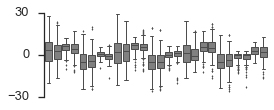

In [54]:
fig, ax = plt.subplots(figsize=(4, 1.5))

kwargs = dict(linewidth=1, fliersize=2, color='grey')

sns.boxplot(t_statistic_homo_sapiens, ax=ax, **kwargs)
# ax.locator_params(nbins=4, axis='y')
ax.set(xlabel='', xticks=[], ylabel='', ylim=(-30, 30), yticks=(-30, 0, 30))
sns.despine(ax=ax, bottom=True)
fig.savefig('{}/t_statistic_homo_sapiens_boxplots.pdf'.format(figure_folder))

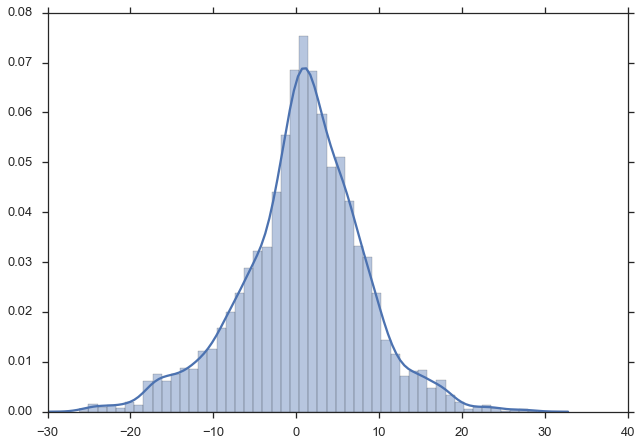

In [55]:
sns.distplot(t_statistic_homo_sapiens.values.flat)

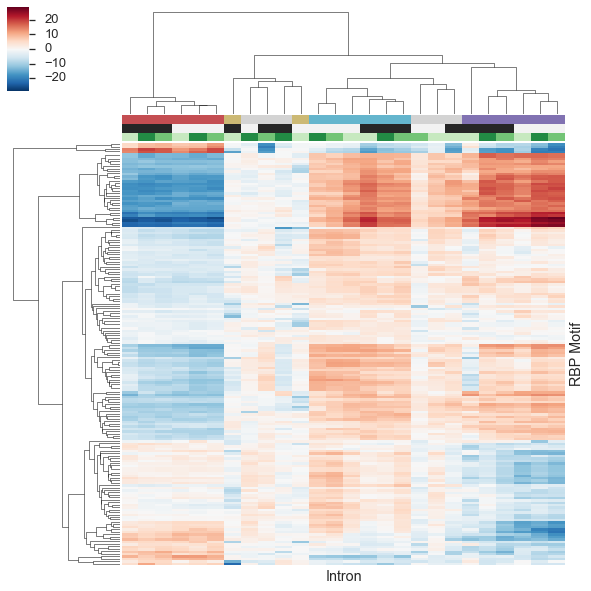

In [56]:
g = sns.clustermap(t_statistic_homo_sapiens, col_colors=intron_colors[t_statistic_homo_sapiens.columns].values)
g.ax_heatmap.set(xticks=[], yticks=[])
g.savefig('{}/t_statistic_homo_sapiens_clustermap.pdf'.format(figure_folder))

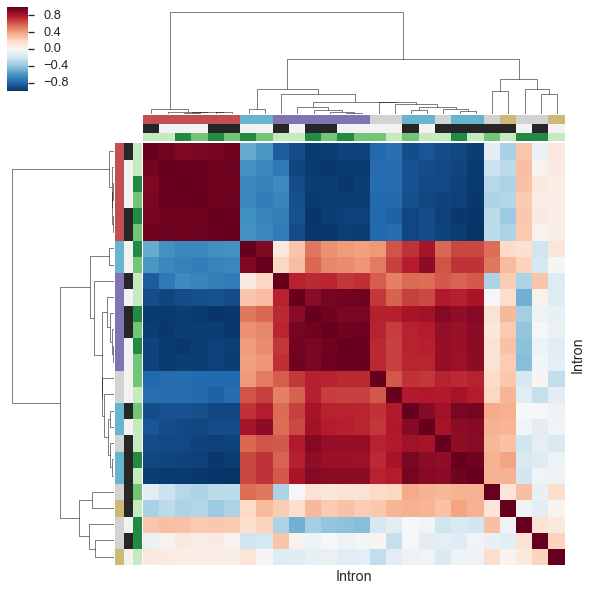

In [57]:
g = sns.clustermap(t_statistic_homo_sapiens.corr(), 
                   row_colors=intron_colors[t_statistic_homo_sapiens.columns].values, 
                   col_colors=intron_colors[t_statistic_homo_sapiens.columns].values)
g.ax_heatmap.set(xticks=[], yticks=[])
g.savefig('{}/t_statistic_homo_sapiens_correlated_clustermap.pdf'.format(figure_folder))

In [58]:
cutoff = t_statistic_homo_sapiens.mean() + 2*t_statistic_homo_sapiens.std()

t_statistic_filtered = t_statistic_homo_sapiens[t_statistic_homo_sapiens >=  cutoff]
t_statistic_filtered = t_statistic_filtered.dropna(how='all')
# mask = t_statistic_filtered.isnull()
# t_statistic_filtered = t_statistic_filtered.fillna(0)
print t_statistic_filtered.shape
t_statistic_filtered.head()

(20, 26)


Intron,upstream200nt_MN_bimodal_placental,downstream200nt_MN_bimodal_placental,upstream200nt_MN_excluded_placental,downstream200nt_MN_excluded_placental,upstream200nt_MN_included_placental,downstream200nt_MN_included_placental,upstream200nt_MN_uncategorized_placental,downstream200nt_MN_uncategorized_placental,upstream200nt_NPC_bimodal_placental,downstream200nt_NPC_bimodal_placental,...,upstream200nt_iPSC_bimodal_placental,downstream200nt_iPSC_bimodal_placental,upstream200nt_iPSC_excluded_placental,downstream200nt_iPSC_excluded_placental,upstream200nt_iPSC_included_placental,downstream200nt_iPSC_included_placental,upstream200nt_iPSC_middle_placental,downstream200nt_iPSC_middle_placental,upstream200nt_iPSC_uncategorized_placental,downstream200nt_iPSC_uncategorized_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.981211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M043_0.6_PCBP2_ENSG00000197111_Homo_sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.948141,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M044_0.6_PPRC1_ENSG00000148840_Homo_sapiens,NaN,NaN,NaN,NaN,15.201479,19.815502,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.700822,14.559975,NaN,NaN,NaN,NaN
M050_0.6_RBM4B_ENSG00000173914_Homo_sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:

uncategorized_middle_t_statistic = t_statistic_filtered.loc[:, uncategorized_middle_cols].dropna(how='all')
uncategorized_middle_t_statistic.head()

Intron,upstream200nt_MN_uncategorized_placental,downstream200nt_MN_uncategorized_placental,upstream200nt_NPC_uncategorized_placental,downstream200nt_NPC_uncategorized_placental,upstream200nt_iPSC_middle_placental,downstream200nt_iPSC_middle_placental,upstream200nt_iPSC_uncategorized_placental,downstream200nt_iPSC_uncategorized_placental
RBP Motif,,,,,,,,
M043_0.6_PCBP2_ENSG00000197111_Homo_sapiens,NaN,6.948141,NaN,NaN,NaN,NaN,NaN,NaN
M126_0.6_SRSF4_ENSG00000116350_Homo_sapiens,5.353467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M127_0.6_ELAVL1_ENSG00000066044_Homo_sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.637034
M177_0.6_PCBP3_ENSG00000183570_Homo_sapiens,NaN,6.246733,NaN,NaN,NaN,NaN,NaN,NaN
M188_0.6_PCBP3_ENSG00000183570_Homo_sapiens,NaN,5.489490,NaN,NaN,NaN,NaN,NaN,NaN


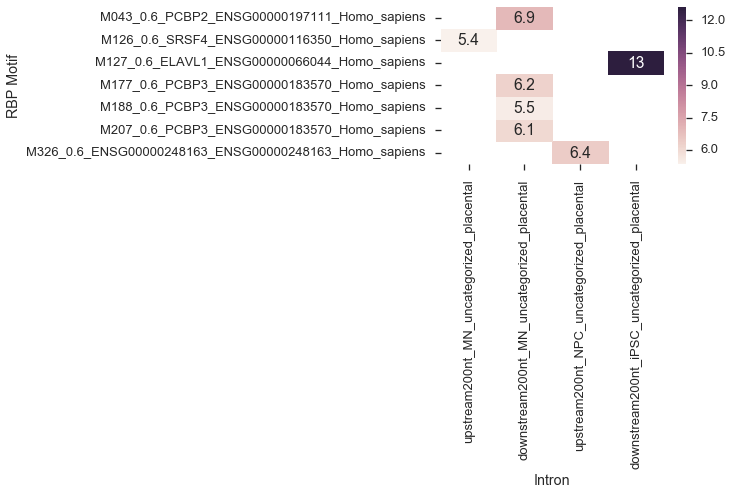

In [60]:
sns.set(context='talk', style='ticks')
fig, ax = plt.subplots()
sns.heatmap(uncategorized_middle_t_statistic.dropna(how='all', axis=1), annot=True)
plt.setp(ax.get_xticklabels(), rotation=90);
fig.tight_layout()

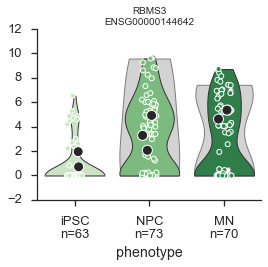

In [61]:
study.plot_gene('RBMS3')

In [62]:
# g = sns.clustermap(t_statistic_filtered.T, figsize=(28, 4), row_colors=intron_colors)
# g.savefig('{}/intron_kmers_vs_cisbp_t_statistic_filtered_transposed.pdf'.format(figure_folder))

In [63]:
# g = sns.clustermap(t_statistic_filtered, figsize=(4, 28), col_colors=intron_colors)
# g.savefig('{}/intron_kmers_vs_cisbp_u_statistic_filtered.pdf'.format(figure_folder))

In [64]:
splicing_rows = study.gene_ontology.data['GO Term Name'].str.contains('splic') \
    & ~study.gene_ontology.data['GO Term Name'].str.contains('tRNA') \
    & ~study.gene_ontology.data['GO Term Name'].str.contains('intein') \
    & ~study.gene_ontology.data['GO Term Name'].str.contains('assembly')

for x in sorted(study.gene_ontology.data.loc[splicing_rows, 'GO Term Name'].unique()):
    print x

RNA splicing
RNA splicing, via transesterification reactions
U12-type spliceosomal complex
U2-type spliceosomal complex
alternative mRNA splicing, via spliceosome
catalytic step 2 spliceosome
mRNA 3'-splice site recognition
mRNA 5'-splice site recognition
mRNA cis splicing, via spliceosome
mRNA splice site selection
mRNA splicing, via spliceosome
negative regulation of RNA splicing
negative regulation of mRNA splicing, via spliceosome
nuclear retention of unspliced pre-mRNA at the site of transcription
positive regulation of RNA splicing
positive regulation of mRNA splicing, via spliceosome
pre-mRNA 3'-splice site binding
regulation of RNA splicing
regulation of alternative mRNA splicing, via spliceosome
regulation of mRNA splicing, via spliceosome
second spliceosomal transesterification activity
spliceosomal complex
splicing factor protein import into nucleus
supraspliceosomal complex


In [65]:
splicing_genes = study.gene_ontology.data.loc[splicing_rows, 'Ensembl Gene ID'].unique()
splicing_genes[:10]

array(['ENSG00000215699', 'ENSG00000168883', 'ENSG00000100142',
       'ENSG00000167281', 'ENSG00000177733', 'ENSG00000070495',
       'ENSG00000171960', 'ENSG00000126653', 'ENSG00000065978',
       'ENSG00000161547'], dtype=object)

In [66]:
elavls = study.expression.feature_data.index[study.expression.feature_data['gene_name'].str.contains('ELAVL')]
elavls

Index([u'ENSG00000066044', u'ENSG00000107105', u'ENSG00000162374',
       u'ENSG00000196361'],
      dtype='object')

In [67]:
hnrnps = study.expression.feature_data.index[study.expression.feature_data['gene_name'].str.contains('HNRNP')]
hnrnps

Index([u'ENSG00000092199', u'ENSG00000096746', u'ENSG00000099783',
       u'ENSG00000104824', u'ENSG00000105323', u'ENSG00000122566',
       u'ENSG00000125944', u'ENSG00000126945', u'ENSG00000135486',
       u'ENSG00000138668',
       ...
       u'ENSG00000260689', u'ENSG00000262333', u'ENSG00000263179',
       u'ENSG00000264315', u'ENSG00000267233', u'ENSG00000269119',
       u'ENSG00000269576', u'ENSG00000270665', u'ENSG00000270837',
       u'ENSG00000270903'],
      dtype='object', length=150)

In [68]:
srsfs = study.expression.feature_data.index[study.expression.feature_data['gene_name'].str.contains('SRSF')]
srsfs

Index([u'ENSG00000100650', u'ENSG00000111786', u'ENSG00000112081',
       u'ENSG00000115875', u'ENSG00000116350', u'ENSG00000116754',
       u'ENSG00000124193', u'ENSG00000136450', u'ENSG00000154548',
       u'ENSG00000161547', u'ENSG00000180771', u'ENSG00000188529',
       u'ENSG00000214867', u'ENSG00000224640', u'ENSG00000267717',
       u'ENSG00000271885'],
      dtype='object')

In [69]:
sf3s = study.expression.feature_data.index[study.expression.feature_data['gene_name'].str.startswith('SF3')]
sf3s

Index([u'ENSG00000087365', u'ENSG00000099995', u'ENSG00000104897',
       u'ENSG00000115128', u'ENSG00000115524', u'ENSG00000143368',
       u'ENSG00000169976', u'ENSG00000183431', u'ENSG00000189091',
       u'ENSG00000230568', u'ENSG00000254449'],
      dtype='object')

In [70]:
fmrs = study.expression.feature_data.index[study.expression.feature_data['gene_name'].str.startswith('FMR')]
fmrs

Index([u'ENSG00000102081', u'ENSG00000176988', u'ENSG00000236337',
       u'ENSG00000268066'],
      dtype='object')

In [71]:
splicing_genes = np.unique(np.concatenate([splicing_genes, elavls, hnrnps, srsfs, sf3s, fmrs]))
len(splicing_genes)

515

In [72]:
splicing_gene_names = study.expression.feature_data.loc[splicing_genes, 'gene_name'].dropna().values

for i in range(1, 4):
    print(i)
    assert 'RBFOX{}'.format(i) in splicing_gene_names
    assert 'MBNL{}'.format(i) in splicing_gene_names
assert 'NOVA1' in splicing_gene_names
assert 'ELAVL1' in splicing_gene_names
assert 'FMR1' in splicing_gene_names

1
2
3


In [73]:
cisbp_metadata_splicing = cisbp_metadata.loc[cisbp_metadata['RBP ID'].isin(splicing_genes)]
cisbp_metadata_splicing.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Full Species
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M016_0.6_FMR1_ENSG00000102081_Homo_sapiens,M016,0.6,FMR1,ENSG00000102081,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M017_0.6_RBFOX2_ENSG00000100320_Homo_sapiens,M017,0.6,RBFOX2,ENSG00000100320,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M019_0.6_SRSF12_ENSG00000154548_Homo_sapiens,M019,0.6,SRSF12,ENSG00000154548,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M022_0.6_HNRNPA1_ENSG00000135486_Homo_sapiens,M022,0.6,HNRNPA1,ENSG00000135486,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens


In [74]:
(cisbp_metadata_splicing['RBP Name'] == "ELAVL1").sum()

5

In [75]:
t_statistic_splicing = t_statistic.loc[cisbp_metadata['RBP ID'].isin(splicing_genes)]
print t_statistic_splicing.shape
t_statistic_splicing.head()

(110, 26)


Intron,upstream200nt_MN_bimodal_placental,downstream200nt_MN_bimodal_placental,upstream200nt_MN_excluded_placental,downstream200nt_MN_excluded_placental,upstream200nt_MN_included_placental,downstream200nt_MN_included_placental,upstream200nt_MN_uncategorized_placental,downstream200nt_MN_uncategorized_placental,upstream200nt_NPC_bimodal_placental,downstream200nt_NPC_bimodal_placental,...,upstream200nt_iPSC_bimodal_placental,downstream200nt_iPSC_bimodal_placental,upstream200nt_iPSC_excluded_placental,downstream200nt_iPSC_excluded_placental,upstream200nt_iPSC_included_placental,downstream200nt_iPSC_included_placental,upstream200nt_iPSC_middle_placental,downstream200nt_iPSC_middle_placental,upstream200nt_iPSC_uncategorized_placental,downstream200nt_iPSC_uncategorized_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,11.299489,9.324577,3.122422,8.590319,-10.129265,-10.461790,1.083059,-4.393504,10.518245,9.016198,...,8.598927,8.265806,9.252545,8.709587,-10.638675,-10.649338,-10.536098,-0.487599,5.943301,7.286519
M016_0.6_FMR1_ENSG00000102081_Homo_sapiens,-8.456880,-5.356287,5.182616,2.802442,2.437392,1.374477,2.160797,-0.888836,-9.738505,-8.042085,...,-8.002913,-9.162796,1.024445,1.971945,3.523571,3.390702,0.530888,-2.520272,2.238170,-2.352067
M017_0.6_RBFOX2_ENSG00000100320_Homo_sapiens,3.951515,6.124728,3.082972,5.561167,-4.878259,-6.551159,3.651468,3.040673,1.412018,3.647150,...,1.481040,3.962186,5.306424,7.019754,-4.771939,-7.358525,2.633112,2.632357,2.684083,4.290092
M019_0.6_SRSF12_ENSG00000154548_Homo_sapiens,-3.001975,1.241724,9.176683,1.074071,-3.781742,-1.351153,2.250676,-2.854465,-4.665558,-4.340642,...,-5.022751,-6.988672,6.786834,2.431280,-2.526519,1.955492,-0.129334,-5.378005,1.601248,-1.550415
M022_0.6_HNRNPA1_ENSG00000135486_Homo_sapiens,1.228275,2.973029,4.696309,2.706727,-4.383688,-3.693197,2.141499,0.891304,1.344144,2.905406,...,0.016165,1.853752,4.227142,2.822527,-4.793343,-3.287716,-0.281094,-1.940157,5.022257,4.045841


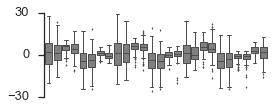

In [76]:
fig, ax = plt.subplots(figsize=(4, 1.5))

kwargs = dict(linewidth=1, fliersize=2, color='grey')

sns.boxplot(t_statistic_splicing, ax=ax, **kwargs)
# ax.locator_params(nbins=4, axis='y')
ax.set(xlabel='', xticks=[], ylabel='', ylim=(-30, 30), yticks=(-30, 0, 30))
sns.despine(ax=ax, bottom=True)
fig.savefig('{}/t_statistic_splicing_boxplots.pdf'.format(figure_folder))

In [77]:
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Full Species
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Drosophila melanogaster
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Caenorhabditis elegans


In [78]:
splicing_rbp_names = cisbp_metadata.loc[t_statistic_splicing.index, 'RBP Name'].str.strip(' ')

Fully rename everything so there's no ENSG...

In [79]:
splicing_rbp_names = splicing_rbp_names.map(lambda x: study.expression.feature_data.loc[x, 'gene_name'] if x in study.expression.feature_data.index else x)

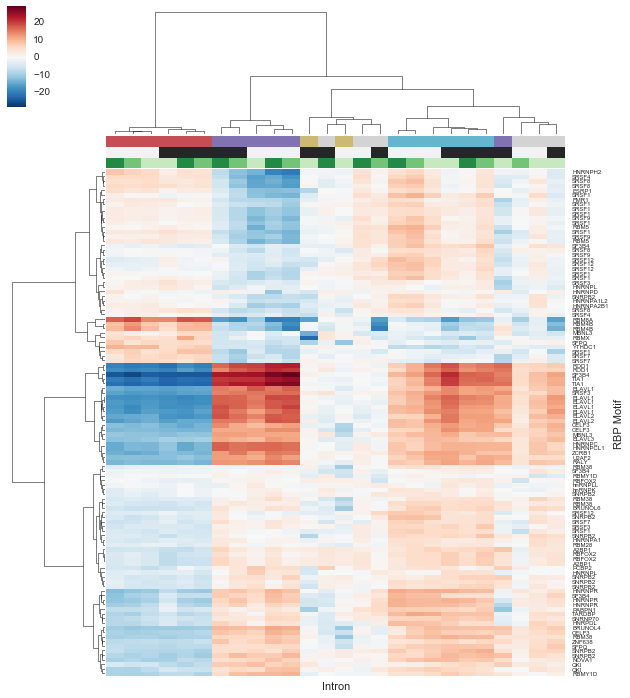

In [80]:
sns.set(style='white')
g = sns.clustermap(t_statistic_splicing, method='ward',
                   col_colors=intron_colors[t_statistic_splicing.columns].values, 
                   yticklabels=splicing_rbp_names, figsize=(10, 12))
g.ax_heatmap.set(xticks=[]);
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=6);
g.savefig('{}/t_statistic_splicing_clustermap.pdf'.format(figure_folder))

## PCA of CISBP kmers

In [81]:
from sklearn.decomposition import PCA

In [82]:
t_statistic_homo_sapiens.head()

Intron,upstream200nt_MN_bimodal_placental,downstream200nt_MN_bimodal_placental,upstream200nt_MN_excluded_placental,downstream200nt_MN_excluded_placental,upstream200nt_MN_included_placental,downstream200nt_MN_included_placental,upstream200nt_MN_uncategorized_placental,downstream200nt_MN_uncategorized_placental,upstream200nt_NPC_bimodal_placental,downstream200nt_NPC_bimodal_placental,...,upstream200nt_iPSC_bimodal_placental,downstream200nt_iPSC_bimodal_placental,upstream200nt_iPSC_excluded_placental,downstream200nt_iPSC_excluded_placental,upstream200nt_iPSC_included_placental,downstream200nt_iPSC_included_placental,upstream200nt_iPSC_middle_placental,downstream200nt_iPSC_middle_placental,upstream200nt_iPSC_uncategorized_placental,downstream200nt_iPSC_uncategorized_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,9.773922,8.763746,4.795954,3.865158,-8.386800,-6.125987,-0.735882,-4.469174,9.318185,7.858505,...,7.974251,5.171420,7.428721,5.222785,-8.556934,-5.584638,0.203737,2.262695,1.754803,2.792677
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-8.180691,-10.528870,-1.257287,-3.050041,6.865188,8.923962,-0.918928,-7.885387,-9.858018,-13.803576,...,-4.303502,-6.865831,-4.668265,-4.452394,7.931694,8.072544,-0.265219,-0.757155,-1.123094,-9.189221
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,11.299489,9.324577,3.122422,8.590319,-10.129265,-10.461790,1.083059,-4.393504,10.518245,9.016198,...,8.598927,8.265806,9.252545,8.709587,-10.638675,-10.649338,-10.536098,-0.487599,5.943301,7.286519
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,18.073469,13.702882,10.643815,13.299264,-17.551504,-15.811573,1.368047,0.009569,18.780338,17.767501,...,15.861790,14.981211,14.453472,14.581558,-16.942974,-17.197455,0.675730,0.113204,6.950149,7.413431
M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,2.553233,5.596075,8.629404,3.975156,-6.750704,-5.877951,0.997941,-2.672161,2.197799,3.593859,...,-0.557489,-1.238760,8.742782,5.551199,-6.510902,-3.915456,-1.438530,-0.236097,6.437776,5.716095


In [83]:
excluded_bimodal_included_cols = [x for x in t_statistic_homo_sapiens.columns if 'bimodal' in x or 'included' in x or 'excluded' in x]
excluded_bimodal_included_cols

['upstream200nt_MN_bimodal_placental',
 'downstream200nt_MN_bimodal_placental',
 'upstream200nt_MN_excluded_placental',
 'downstream200nt_MN_excluded_placental',
 'upstream200nt_MN_included_placental',
 'downstream200nt_MN_included_placental',
 'upstream200nt_NPC_bimodal_placental',
 'downstream200nt_NPC_bimodal_placental',
 'upstream200nt_NPC_excluded_placental',
 'downstream200nt_NPC_excluded_placental',
 'upstream200nt_NPC_included_placental',
 'downstream200nt_NPC_included_placental',
 'upstream200nt_iPSC_bimodal_placental',
 'downstream200nt_iPSC_bimodal_placental',
 'upstream200nt_iPSC_excluded_placental',
 'downstream200nt_iPSC_excluded_placental',
 'upstream200nt_iPSC_included_placental',
 'downstream200nt_iPSC_included_placental']

In [84]:
t_statistic_excluded_bimodal_included = t_statistic_splicing[excluded_bimodal_included_cols]

In [85]:
excluded_bimodal_included_phenotype_colors = [study.phenotype_to_color[x.split('_')[1]] for x in excluded_bimodal_included_cols]
excluded_bimodal_included_modality_colors = [MODALITY_TO_COLOR[x.split('_')[2]] for x in excluded_bimodal_included_cols]
excluded_bimodal_included_direction_colors = [direction_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')] for x in 
                                              excluded_bimodal_included_cols]
excluded_bimodal_included_intron_colors = pd.DataFrame([excluded_bimodal_included_modality_colors, 
                                           excluded_bimodal_included_direction_colors, 
                                           excluded_bimodal_included_phenotype_colors], columns=excluded_bimodal_included_cols)
excluded_bimodal_included_intron_colors

,upstream200nt_MN_bimodal_placental,downstream200nt_MN_bimodal_placental,upstream200nt_MN_excluded_placental,downstream200nt_MN_excluded_placental,upstream200nt_MN_included_placental,downstream200nt_MN_included_placental,upstream200nt_NPC_bimodal_placental,downstream200nt_NPC_bimodal_placental,upstream200nt_NPC_excluded_placental,downstream200nt_NPC_excluded_placental,upstream200nt_NPC_included_placental,downstream200nt_NPC_included_placental,upstream200nt_iPSC_bimodal_placental,downstream200nt_iPSC_bimodal_placental,upstream200nt_iPSC_excluded_placental,downstream200nt_iPSC_excluded_placental,upstream200nt_iPSC_included_placental,downstream200nt_iPSC_included_placental
0,"(0.505882352941, 0.447058823529, 0.698039215686)","(0.505882352941, 0.447058823529, 0.698039215686)","(0.392156862745, 0.709803921569, 0.803921568627)","(0.392156862745, 0.709803921569, 0.803921568627)","(0.76862745098, 0.305882352941, 0.321568627451)","(0.76862745098, 0.305882352941, 0.321568627451)","(0.505882352941, 0.447058823529, 0.698039215686)","(0.505882352941, 0.447058823529, 0.698039215686)","(0.392156862745, 0.709803921569, 0.803921568627)","(0.392156862745, 0.709803921569, 0.803921568627)","(0.76862745098, 0.305882352941, 0.321568627451)","(0.76862745098, 0.305882352941, 0.321568627451)","(0.505882352941, 0.447058823529, 0.698039215686)","(0.505882352941, 0.447058823529, 0.698039215686)","(0.392156862745, 0.709803921569, 0.803921568627)","(0.392156862745, 0.709803921569, 0.803921568627)","(0.76862745098, 0.305882352941, 0.321568627451)","(0.76862745098, 0.305882352941, 0.321568627451)"
1,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626,#F2F2F2,#262626
2,#228a44,#228a44,#228a44,#228a44,#228a44,#228a44,#73c476,#73c476,#73c476,#73c476,#73c476,#73c476,#c7e9c0,#c7e9c0,#c7e9c0,#c7e9c0,#c7e9c0,#c7e9c0


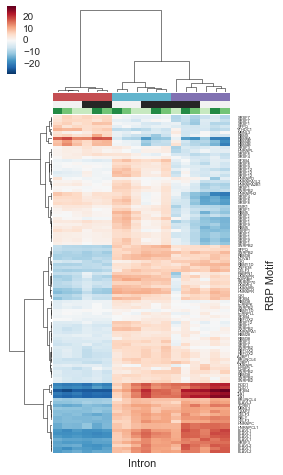

In [86]:
sns.set(style='white')
g = sns.clustermap(t_statistic_excluded_bimodal_included, method='ward',
                   col_colors=excluded_bimodal_included_intron_colors.values, 
                   yticklabels=splicing_rbp_names, figsize=(4, 8))
g.ax_heatmap.set(xticks=[]);
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=4);
g.savefig('{}/t_statistic_excluded_bimodal_included_splicing_clustermap.pdf'.format(figure_folder))

In [87]:
data = t_statistic_excluded_bimodal_included

pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(data), 
                       index=data.index)
reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
# reduced = reduced
print reduced.shape
reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))
reduced.head()

(110, 2)


,component_0,component_1
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,-24.740990,2.903407
M016_0.6_FMR1_ENSG00000102081_Homo_sapiens,29.506838,-5.780431
M017_0.6_RBFOX2_ENSG00000100320_Homo_sapiens,-4.664388,0.880113
M019_0.6_SRSF12_ENSG00000154548_Homo_sapiens,14.513266,-7.896825
M022_0.6_HNRNPA1_ENSG00000135486_Homo_sapiens,1.914968,2.123958


In [88]:
gene_names = reduced.index.map(lambda x: x.split('_')[2])
gene_names = [study.expression.feature_data.gene_name[x] if x in study.expression.feature_data.index else x for x in gene_names]
gene_names = [x if x != 'ENSG00000248163' else 'NOVA1' for x in gene_names]

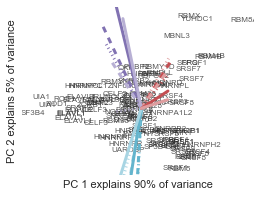

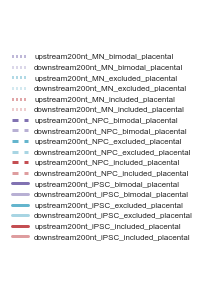

In [89]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
# ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
    ax.text(row[0], row[1], gene_name, horizontalalignment='center', clip_on=True,
            verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = '-'
    elif phenotype == 'NPC':
        linestyle = 'dashed'
    else:
        linestyle = ':'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], 
                    [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()*1.1
xmax, ymax = reduced.max()*1.1

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
fig.savefig('{}/kmer_cisbp_motif_pca.pdf'.format(figure_folder))

# ax.set(xlabel='', ylabel='')
# quadrants = {'upper_left': dict(xlim=(xmin, 0), ylim=(0, ymax)),
#              'upper_right': dict(xlim=(0, xmax), ylim=(0, ymax)),
#              'lower_left': dict(xlim=(xmin, 0), ylim=(ymin, 0)),
#              'lower_right': dict(xlim=(0, xmax), ylim=(ymin, 0))}
# for quadrant, limits in quadrants.items():
#     ax.set(**limits)
#     fig.savefig('{}/kmer_cisbp_motif_pca_quadrant_{}.pdf'.format(utest_folder, quadrant))

# Make legend separately by hand
legend_fig, legend_ax = plt.subplots(figsize=(3, 4.25))#, fontdict=dict(fontsize=8))
legend_ax.legend(ax.lines, labels, ncol=1, loc='center', fontsize=8);
sns.despine(bottom=True, left=True, fig=legend_fig)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_cisbp_motif_pca_legend.pdf'.format(figure_folder))


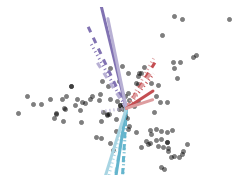

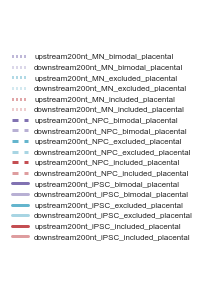

In [90]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
ax.scatter(reduced.iloc[:, 0], reduced.iloc[:, 1], color='k', alpha=0.5)
# for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
#     ax.text(row[0], row[1], gene_name, horizontalalignment='center', clip_on=True,
#             verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = '-'
    elif phenotype == 'NPC':
        linestyle = 'dashed'
    else:
        linestyle = ':'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], 
                    [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()*1.1
xmax, ymax = reduced.max()*1.1

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
fig.savefig('{}/kmer_cisbp_motif_pca_points.pdf'.format(figure_folder))

ax.set(xlabel='', ylabel='')
quadrants = {'upper_left': dict(xlim=(xmin, 0), ylim=(0, ymax)),
             'upper_right': dict(xlim=(0, xmax), ylim=(0, ymax)),
             'lower_left': dict(xlim=(xmin, 0), ylim=(ymin, 0)),
             'lower_right': dict(xlim=(0, xmax), ylim=(ymin, 0))}
# for quadrant, limits in quadrants.items():
#     ax.set(**limits)
#     fig.savefig('{}/kmer_cisbp_motif_pca_quadrant_{}_points.pdf'.format(figure_folder, quadrant))

# Make legend separately by hand
legend_fig, legend_ax = plt.subplots(figsize=(3, 4.25))#, fontdict=dict(fontsize=8))
legend_ax.legend(ax.lines, labels, ncol=1, loc='center', fontsize=8);
sns.despine(bottom=True, left=True, fig=legend_fig)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_cisbp_motif_pca_legend.pdf'.format(figure_folder))


In [91]:
import matplotlib as mpl

In [92]:
import plotly.plotly as py
import plotly.graph_objs as go


text = ['{}<br>{}'.format(y, x.split('_')[0]) for x, y  in zip(reduced.index, gene_names)]
trace0 = go.Scatter(x=reduced.iloc[:, 0], y=reduced.iloc[:, 1], mode='markers', name='Motifs',
                    marker=dict(size=10, opacity=0.5, color='black'), text=text)

lines = []
scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = 'solid'
    elif phenotype == 'NPC':
        linestyle = 'dash'
    else:
        linestyle = 'dot'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = map(mpl.colors.rgb2hex, reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            x = [0, column[0]*scaling_factor]
            y = [0, column[1]*scaling_factor]
            lines.append(go.Scatter(x=x, y=y, mode='lines', name=component, text=component,
                                    line=dict(color=color, width=10, dash=linestyle)))
#             print tier, direction, component
#             labels.append(component)
#             ax.plot([0, column[0]], [0, column[1]], label=component, 
#                     linewidth=3, 
#                     color=color, zorder=100, linestyle=linestyle)

plotly_data = [trace0] + lines
layout = go.Layout(
#     autosize=False, width=500, height=500,
    title='Motif enrichment in modality k-mers (t-Test)',
    hovermode='closest',
    xaxis=dict(
        title='PC 1 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[0] * 100)),
        ticklen=5,
        zeroline=False,
        gridwidth=0,
    ),
    yaxis=dict(
        title='PC 2 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[1] * 100)),
        ticklen=5,
        zeroline=True,
        gridwidth=0,
    ),
)
fig = go.Figure(data=plotly_data, layout=layout)
py.iplot(fig, filename='motif-ttest-enrichment-modality-kmers-v3')

In [93]:
figure_folder

'figures/kmer_counting'

In [94]:
ax.get_xlim()

(-86.912650853069579, 82.304604051886955)

In [95]:
reduced.apply(np.linalg.norm, axis=1).max()

79.018372408462213

In [96]:
components

Intron,upstream200nt_MN_bimodal_placental,downstream200nt_MN_bimodal_placental,upstream200nt_MN_excluded_placental,downstream200nt_MN_excluded_placental,upstream200nt_MN_included_placental,downstream200nt_MN_included_placental,upstream200nt_NPC_bimodal_placental,downstream200nt_NPC_bimodal_placental,upstream200nt_NPC_excluded_placental,downstream200nt_NPC_excluded_placental,upstream200nt_NPC_included_placental,downstream200nt_NPC_included_placental,upstream200nt_iPSC_bimodal_placental,downstream200nt_iPSC_bimodal_placental,upstream200nt_iPSC_excluded_placental,downstream200nt_iPSC_excluded_placental,upstream200nt_iPSC_included_placental,downstream200nt_iPSC_included_placental
0,-0.336026,-0.255933,-0.053674,-0.164496,0.251838,0.250933,-0.356764,-0.291230,-0.070857,-0.141642,0.263192,0.250746,-0.292331,-0.170370,-0.139757,-0.205887,0.245870,0.243057
1,0.203973,-0.010496,-0.358967,-0.209348,0.106205,0.152950,0.253318,0.152045,-0.415187,-0.287188,0.140111,0.120251,0.395137,0.275338,-0.301040,-0.220436,0.053188,0.026488


In [98]:
sns.set?